In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [14]:
# Set the data directory path
data_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

In [15]:
# Parameters
img_height, img_width = 128, 128
batch_size = 32
epochs = 15

In [16]:
# Data Augmentation and Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% of data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
# Train Generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 60000 images belonging to 5 classes.


In [18]:
# Validation Generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 15000 images belonging to 5 classes.


In [19]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 categories for rice varieties
])

In [20]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]  # Stop early if no improvement
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1393s 740ms/step - accuracy: 0.7293 - loss: 0.6672 - val_accuracy: 0.9750 - val_loss: 0.0768
Epoch 2/15


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0169
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1175s 626ms/step - accuracy: 0.9421 - loss: 0.1746 - val_accuracy: 0.9753 - val_loss: 0.0720
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 104us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.0490
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1173s 625ms/step - accuracy: 0.9592 - loss: 0.1220 - val_accuracy: 0.9868 - val_loss: 0.0398


In [23]:
# Evaluate the Model
val_labels = validation_generator.classes
val_pred = np.argmax(model.predict(validation_generator), axis=-1)


469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 288ms/step


In [28]:
# Print the final training accuracy
final_train_acc = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")

# Print the final validation accuracy
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9619
Final Validation Accuracy: 0.9868


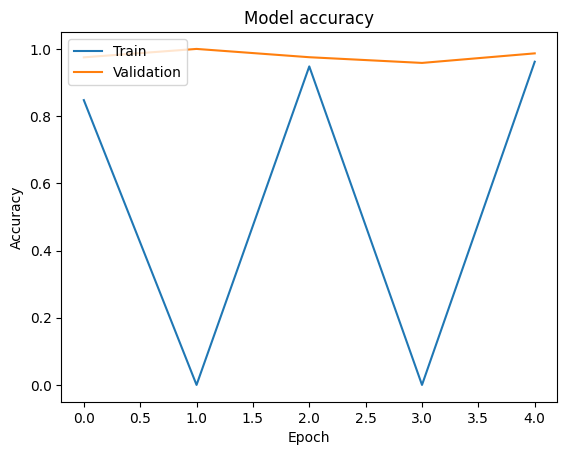

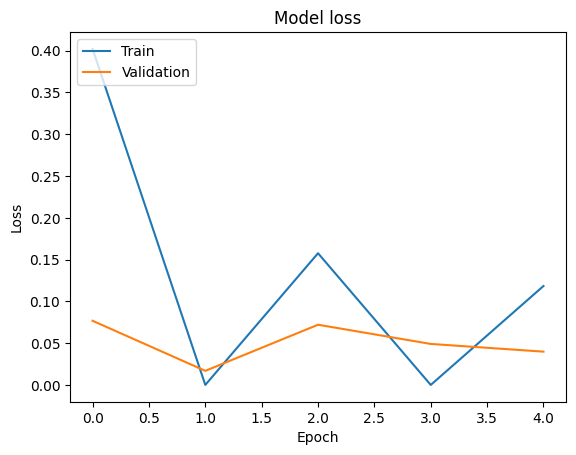

In [27]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

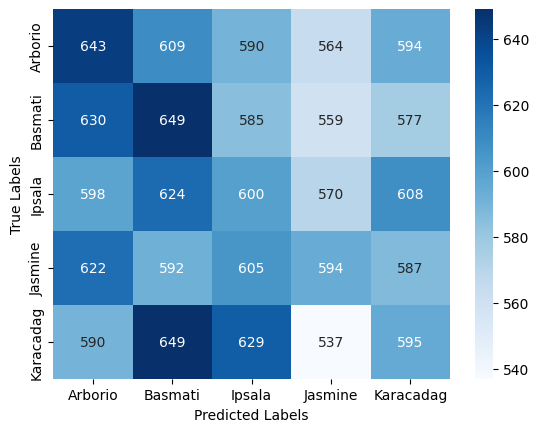

In [35]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(val_labels, val_pred)
#Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
print("Classification Report")
target_names = list(train_generator.class_indices.keys())
print(classification_report(val_labels, val_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Arborio       0.21      0.21      0.21      3000
     Basmati       0.21      0.22      0.21      3000
      Ipsala       0.20      0.20      0.20      3000
     Jasmine       0.21      0.20      0.20      3000
   Karacadag       0.20      0.20      0.20      3000

    accuracy                           0.21     15000
   macro avg       0.21      0.21      0.21     15000
weighted avg       0.21      0.21      0.21     15000

